In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv('./recife-dados-despesas-2019.csv', sep=';') 
df.head()


ano_movimentacao  mes_movimentacao  orgao_codigo  \
0              2019                 5             9   
1              2019                 1             9   
2              2019                 3             9   
3              2019                 7             9   
4              2019                 9             9   

                        orgao_nome  unidade_codigo  \
0  ASSESSORIA ESPECIAL DO PREFEITO            9.01   
1  ASSESSORIA ESPECIAL DO PREFEITO            9.01   
2  ASSESSORIA ESPECIAL DO PREFEITO            9.01   
3  ASSESSORIA ESPECIAL DO PREFEITO            9.01   
4  ASSESSORIA ESPECIAL DO PREFEITO            9.01   

                                        unidade_nome  \
0  ASSESSORIA ESPECIAL DO PREFEITO - ADMINISTRAÇÃ...   
1  ASSESSORIA ESPECIAL DO PREFEITO - ADMINISTRAÇÃ...   
2  ASSESSORIA ESPECIAL DO PREFEITO - ADMINISTRAÇÃ...   
3  ASSESSORIA ESPECIAL DO PREFEITO - ADMINISTRAÇÃ...   
4  ASSESSORIA ESPECIAL DO PREFEITO - ADMINISTRAÇÃ...   

   categoria_economica_codigo categoria_economica_nome  grupo_despesa_codigo  \
0                           3       DESPESAS CORRENTES                     1   
1                           3       DESPESAS CORRENTES                     1   
2                           3       DESPESAS CORRENTES                     1   
3                           3       DESPESAS CORRENTES                     1   
4                           3       DESPESAS CORRENTES                     1   

           grupo_despesa_nome  ...  empenho_numero subempenho  \
0  PESSOAL E ENCARGOS SOCIAIS  ...               1         85   
1  PESSOAL E ENCARGOS SOCIAIS  ...               2         81   
2  PESSOAL E ENCARGOS SOCIAIS  ...               2         83   
3  PESSOAL E ENCARGOS SOCIAIS  ...               2         87   
4  PESSOAL E ENCARGOS SOCIAIS  ...               2         89   

   indicador_subempenho credor_codigo           credor_nome  \
0                     x             0  CREDOR NÃO INFORMADO   
1                     x             0  CREDOR NÃO INFORMADO   
2                     x             0  CREDOR NÃO INFORMADO   
3                     x             0  CREDOR NÃO INFORMADO   
4                     x             0  CREDOR NÃO INFORMADO   

  modalidade_licitacao_codigo  modalidade_licitacao_nome valor_empenhado  \
0                           0              NÃO INFORMADA         4560,91   
1                           0              NÃO INFORMADA          604,50   
2                           0              NÃO INFORMADA          604,50   
3                           0              NÃO INFORMADA          604,50   
4                           0              NÃO INFORMADA          604,50   

   valor_liquidado valor_pago  
0          4560,91    4560,91  
1           604,50     604,50  
2           604,50     604,50  
3           604,50     604,50  
4           604,50     604,50  

[5 rows x 39 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116214 entries, 0 to 116213
Data columns (total 39 columns):
ano_movimentacao               116214 non-null int64
mes_movimentacao               116214 non-null int64
orgao_codigo                   116214 non-null int64
orgao_nome                     116214 non-null object
unidade_codigo                 116214 non-null float64
unidade_nome                   116214 non-null object
categoria_economica_codigo     116214 non-null int64
categoria_economica_nome       116214 non-null object
grupo_despesa_codigo           116214 non-null int64
grupo_despesa_nome             116214 non-null object
modalidade_aplicacao_codigo    116214 non-null int64
modalidade_aplicacao_nome      116214 non-null object
elemento_codigo                116214 non-null int64
elemento_nome                  116214 non-null object
subelemento_codigo             116214 non-null int64
subelemento_nome               116214 non-null object
funcao_codigo                  1

In [4]:
x = []
divida=0
social = 0
for index, row in df.iterrows():
    x.append(row['grupo_despesa_nome'])
    if ( (row['grupo_despesa_nome'] == 'JUROS E ENCARGOS DA DÍVIDA')):
        divida += float(row['valor_pago'].replace(',','.'))
    elif (row['grupo_despesa_nome'] == 'PESSOAL E ENCARGOS SOCIAIS'):
        social += float(row['valor_pago'].replace(',','.'))

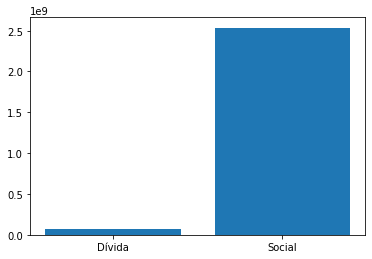

In [5]:
#for i in set(x):
#    if 'UFPE' in i:
#        print (i)
#divida
#set(x)
plt.bar(['Dívida', 'Social'], [divida, social])

plt.show()

In [12]:
x = []
y = []
divida=0
social = 0
dic={}
dic2={}
for index, row in df.iterrows():
    if (not row['orgao_codigo'] in x):
        x.append(row['orgao_codigo'])
        dic2[row['orgao_codigo']] = row['orgao_nome']
        dic[row['orgao_codigo']] = float(row['valor_pago'].replace(',','.'))
    else:
        dic[row['orgao_codigo']] += float(row['valor_pago'].replace(',','.'))
        
#dic
#for a, b in dic.items():
#    print (a)
#    print (b)
        
x, y = zip(*dic.items()) # unpack a list of pairs into two tuples
  



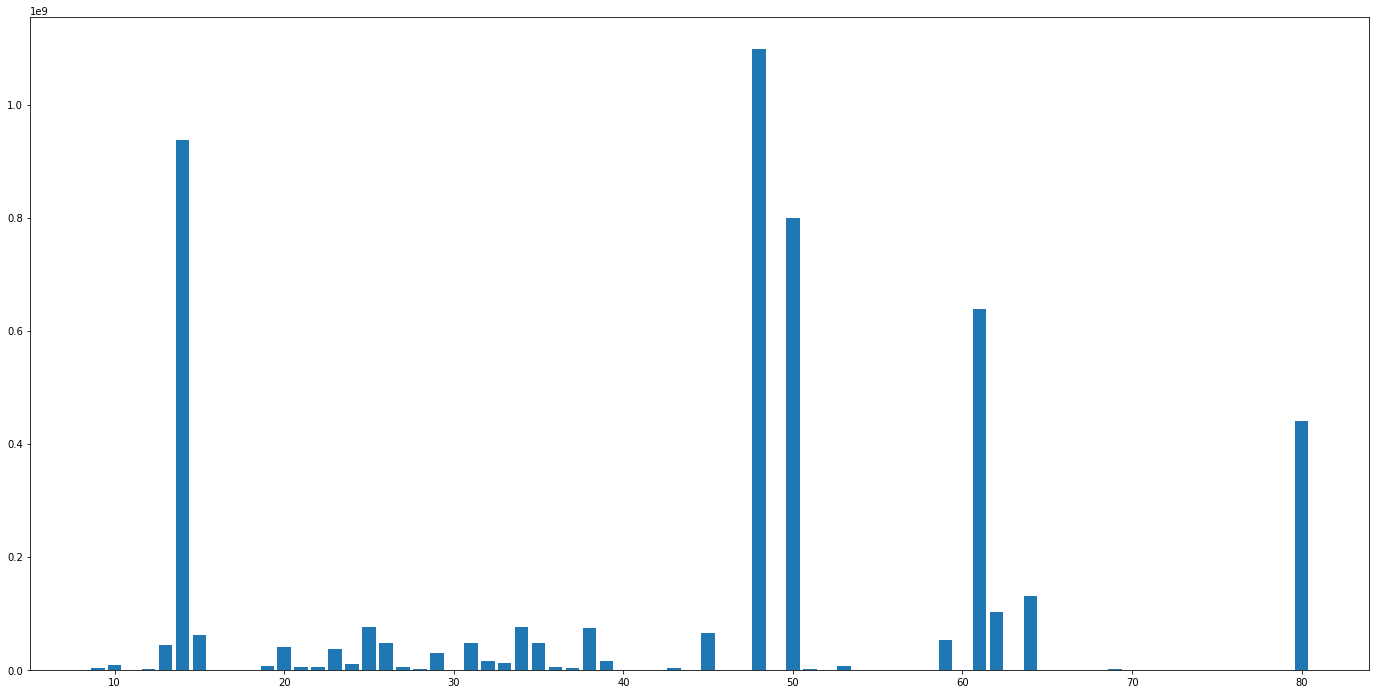

In [13]:
plt.subplots(figsize=(24,12))
plt.bar(x,y)

plt.savefig('asd.png')  

In [14]:
dic2

{9: 'ASSESSORIA ESPECIAL DO PREFEITO',
 10: 'GABINETE DO PREFEITO',
 12: 'GABINETE DO VICE-PREFEITO',
 13: 'PROCURADORIA GERAL DO MUNICÍPIO',
 14: 'SECRETARIA DE EDUCAÇÃO',
 15: 'SECRETARIA DE FINANÇAS',
 20: 'SECRETARIA DE INFRAESTRUTURA',
 22: 'SECRETARIA DA MULHER',
 23: 'SECRETARIA DE SANEAMENTO',
 24: 'CONTROLADORIA GERAL DO MUNICÍPIO',
 25: 'SECRETARIA DE GOVERNO E PARTICIPAÇÃO SOCIAL',
 26: 'GABINETE DE PROJETOS ESPECIAIS',
 28: 'GABINETE DE REPRESENTAÇÃO EM BRASÍLIA E RELAÇÕES INTERNACIONAIS',
 29: 'SECRETARIA DE DESENVOLVIMENTO SOCIAL, JUVENTUDE, POLÍTICAS SOBRE DROGAS E DIREITOS HUMANOS',
 31: 'SECRETARIA DE ADMINISTRAÇÃO E GESTÃO DE PESSOAS',
 32: 'SECRETARIA DE CULTURA',
 33: 'SECRETARIA DE PLANEJAMENTO URBANO',
 34: 'SECRETARIA DE MOBILIDADE E CONTROLE URBANO',
 35: 'SECRETARIA DE TURISMO, ESPORTES E LAZER',
 36: 'GABINETE DE IMPRENSA',
 38: 'SECRETARIA DE SEGURANÇA URBANA',
 39: 'SECRETARIA DE MEIO AMBIENTE E SUSTENTABILIDADE',
 80: 'ENCARGOS GERAIS DO MUNCÍPIO',
 48: 'SE